## Finite Impulse Response (FIR) filters

In signal processing, a finite impulse response (FIR) filter is a filter whose impulse response (or response to any finite length input) is of finite duration, because it settles to zero in finite time.

For a general N-tap FIR filter, the nth output is

![FIR](../Images/FIR_new.png)

We have already used this formula, since the moving average filter is a kind of FIR filter.

![FIR_Average](../Images/FIR_Average_new.png)

Example of finite impulse response (FIR) filter.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import SquareSignal, Wave, decorate

# suppress scientific notation for small numbers
np.set_printoptions(precision=3, suppress=True)

The wave we are going to filter.

In [4]:
from thinkdsp import read_wave
my_sound = read_wave('./320952__kevcio__amen-break-f-180-bpm-16-bars.wav')
my_sound.make_audio()

Let's make a 5-tap FIR filter using the following coefficients: 0.1, 0.2, 0.2, 0.2, 0.1.

[0.1 0.2 0.2 0.2 0.1]


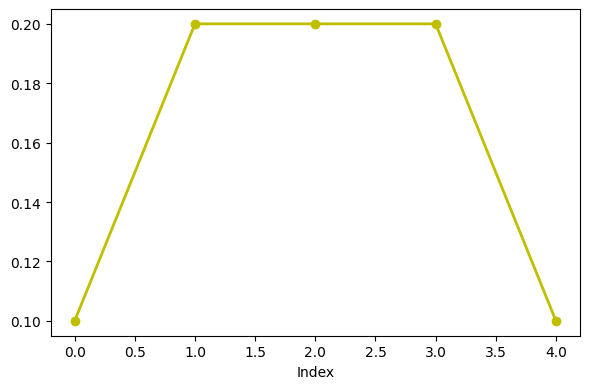

In [9]:
window = np.array([0.1, 0.2, 0.2, 0.2, 0.1])
print(window)
plt.plot(window, 'yo-', linewidth=2)
decorate(xlabel='Index')

And now, let's apply the window to the signal using np.convolve

In [11]:
filtered = np.convolve(my_sound.ys, window, mode='same')
filtered_violin = Wave(filtered, framerate=my_sound.framerate)
filtered_violin.make_audio()

Text(0.5, 1.0, 'Filtered')

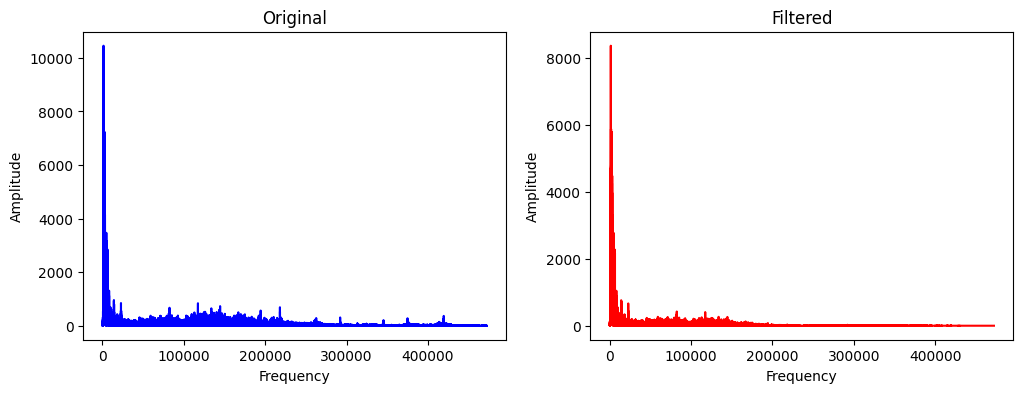

In [7]:
# Changes the default size of the plots
plt.rcParams["figure.figsize"] = [12, 4]

original_spectrum = my_sound.make_spectrum()
smooth_spectrum = filtered_violin.make_spectrum()
plt.subplot(1,2,1)
plt.plot(original_spectrum.amps, 'b-')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Original')
plt.subplot(1,2,2)
plt.plot(smooth_spectrum.amps,'r-')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Filtered')

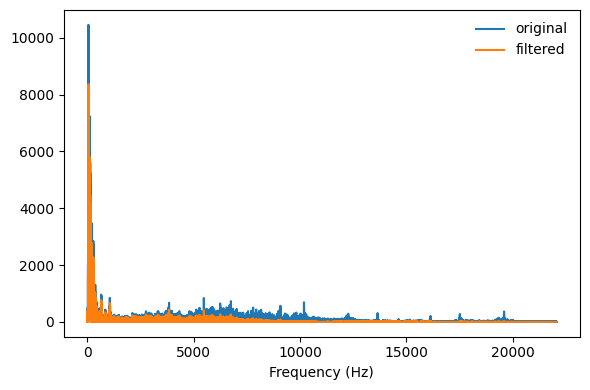

In [8]:
# Changes the default size of the plots
plt.rcParams["figure.figsize"] = [6, 4]

original_spectrum = my_sound.make_spectrum()
smooth_spectrum = filtered_violin.make_spectrum()
original_spectrum.plot(label='original')
smooth_spectrum.plot(label='filtered')
decorate(xlabel='Frequency (Hz)')